In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import os

In [ ]:
directory = "path/to/internal/experiment/directory"

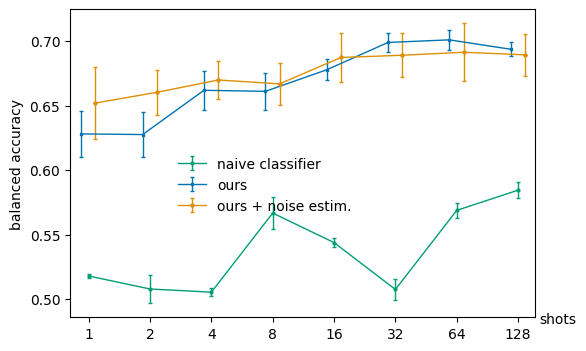

In [7]:

files = sorted(glob.glob(os.path.join(directory, "*_shots_bal_acc.npy")), key=lambda f: int(os.path.basename(f).split("_")[0]))
x_values = [] 
means = []
stds = []  

for file in files:
    x_value = int(os.path.basename(file).split("_")[0])  
    x_values.append(x_value)

    data = np.load(file)  

    mean = np.mean(data, axis=1)
    std = np.std(data, axis=1)

    means.append(mean)
    stds.append(std)

x_values = np.array(x_values)
means = np.array(means) 
stds = np.array(stds) 

sorted_indices = np.argsort(x_values)
x_values = x_values[sorted_indices]
bal_means = means[sorted_indices]
bal_stds = stds[sorted_indices]/np.sqrt(5)

models = ["naive classifier", "ours", "ours + noise estim."]
colors = [sns.color_palette("colorblind", 3)[i] for i in [2, 1, 0]]
markers = ["o-", "s-", "D-"]

fig, ax = plt.subplots(figsize=(6, 4))
j = [0, -0.08, 0.08]
for i in range(3):
    jitter = x_values * j[i]
    ax.errorbar(x_values + jitter, bal_means[:, i], yerr=bal_stds[:, i], 
                label=models[i], color=colors[-i], fmt = markers[i],
                capsize=1.5, markersize=2, linewidth=1)

ax.set_xscale('log', base=2)
ax.text(1.01, -0.02, "shots", transform=ax.transAxes)
ax.set_ylabel("balanced accuracy")
ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64, 128])
ax.set_xlim(0.81, 155)
ax.legend(frameon=False, loc = (0.22, 0.32))
plt.show()

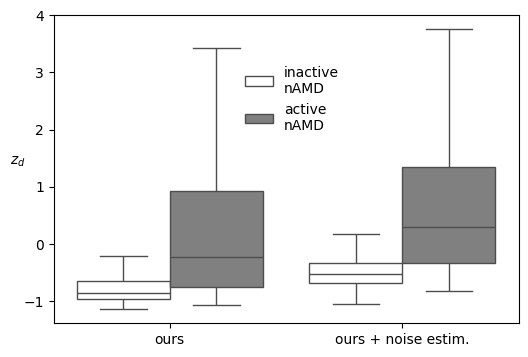

In [ ]:
fold = 2
shots = 2

noise = "no_gamma"
z_p = np.load(f"{directory}{shots}_shots_z_p_{noise}.npy")[fold]
labels = np.load(f"{directory}{shots}_shots_labels_{noise}.npy")[fold]
labels = np.where(labels == 0, "inactive\nnAMD", "active\nnAMD")

noise = "gamma"
z_p2 = np.load(f"{directory}{shots}_shots_z_p_{noise}.npy")[fold]
labels2 = np.load(f"{directory}{shots}_shots_labels_{noise}.npy")[fold]
labels2 = np.where(labels2 == 0, "inactive\nnAMD", "active\nnAMD")

df = pd.DataFrame({
    "z_p": np.concatenate([z_p, z_p2]),
    "Noise Type": ["ours"] * len(z_p) + ["ours + noise estim."] * len(z_p2),
    "Label": np.concatenate([labels, labels2])
})

fig, ax = plt.subplots(figsize=(6, 4))

paletti = ["white", "gray"]
sns.boxplot(x="Noise Type", y="z_p", hue="Label", data=df, ax=ax, showfliers=False, palette=paletti)

ax.set_xlabel("")
ax.set_ylabel(r"$z_d$", rotation=0)

ax.legend(frameon=False, loc = (0.4, 0.6))
plt.show()